In [544]:
! which python

/Users/marek/Documents/school/masters/vysledky/venv/bin/python


# Zhromazdenie vysledkov
a spracovanie

In [545]:
import pandas as pd
import matplotlib.pyplot as plt

In [546]:
df = pd.read_json("tradeoff_train-tune_v2.json",orient="values")

In [547]:
def are_equal_steps(column):
    size = len(column)
    for i in range(size):
        for j in range(size):
            column[i].sort()
            column[j].sort()
            if column[i] != column[j]:
                return False
    return True

In [548]:
def create_frame(df,title, name):
    data = df.copy()
    if not are_equal_steps(data.x):
        print("Set has different steps")
        return
    
    steps = pd.DataFrame(data.x[0],columns=["step"])
    
    data = data[['y','name']].transpose()
    data = data.rename(columns=data.iloc[1])
    data = data.iloc[:1]
    data = data.apply(lambda x: x.explode(),axis=0).reset_index(drop=True)
    data = pd.concat([steps,data],axis=1)
    
    new_cols = [re.sub(r'(\d+).*', r'\g<1>', i) for i in data.columns]
    mapping = {i:j for i,j in zip(data.columns, new_cols)}
    data = data.rename(columns=mapping)

    fig, axs = plt.subplots(figsize=(10,10), tight_layout=True)        # Create an empty matplotlib Figure and Axes
    data.plot.line(x='step',ax=axs)                  # Use pandas to put the area plot on the prepared Figure/Axes
    axs.set_ylabel("BLEU")                           # Do any matplotlib customization you like
    axs.set_xlabel('step')
    fig.tight_layout()
    fig.savefig(name,bbox_inches='tight',facecolor='white', transparent=False)
    
    return data

In [549]:
train = df.iloc[:1].reset_index(drop=True)
tune = df.iloc[1:].reset_index(drop=True)

In [550]:
import re
[re.sub(r'.*-([1-90]{2})([0]{1}).*', r'\g<1>', i) for i in tune.columns]

['x', 'y', 'type', 'name']

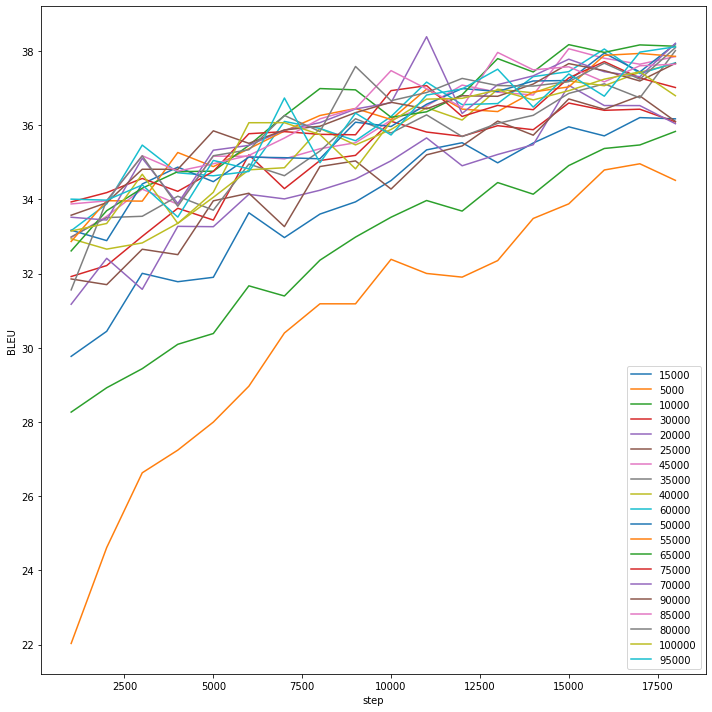

In [551]:
tune = create_frame(tune,"Fine-Tuning BLEU",'tradeoff_FT_bleu.png')

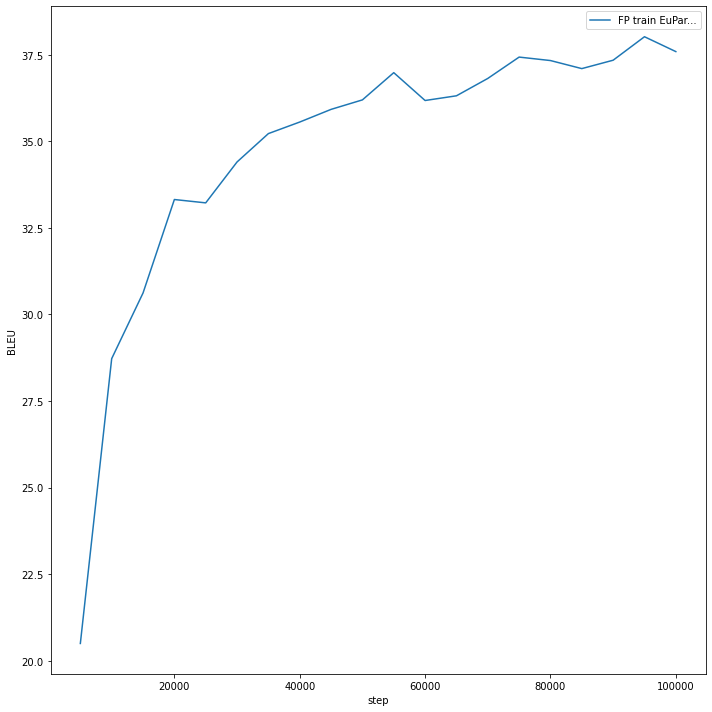

In [552]:
train = create_frame(train,"Validation BLEU",'tradeoff_train_val_bleu.png')

## Analysis of rank - Is resulting BLEU dependant on starting step? (should be)

<AxesSubplot:xlabel='model', ylabel='last'>

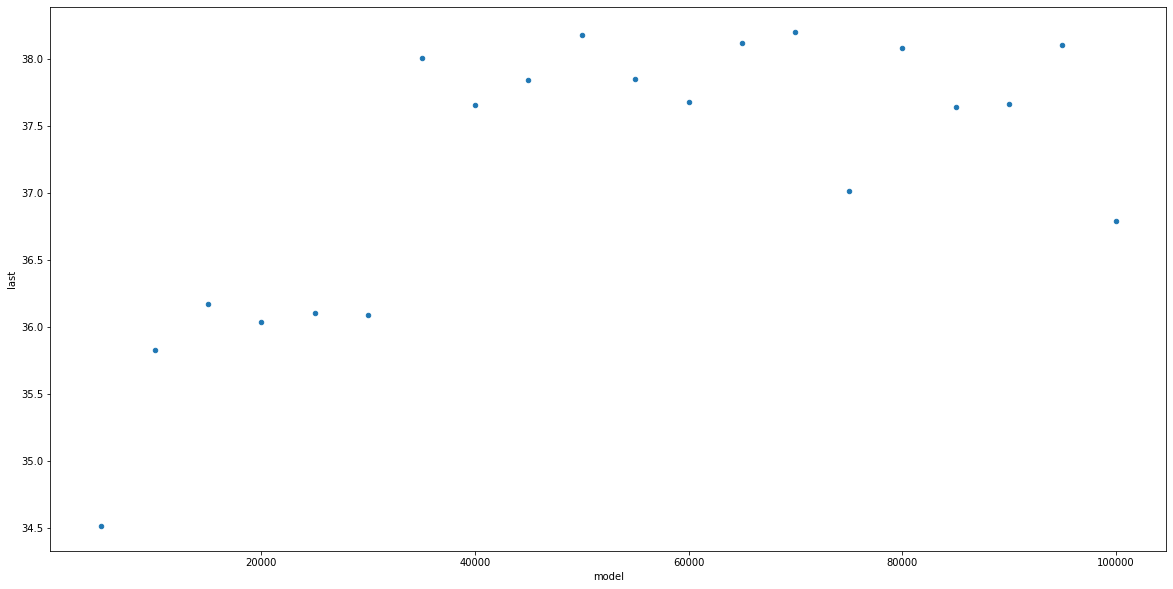

In [553]:
last = tune.iloc[-1:,:].transpose()
# last.index.name = "model"
last = last.reset_index()
last = last.set_axis(['model','last'],axis=1)[1:]
last.model = last.model.astype("int")
last.sort_values(by="model",ascending=True).plot.scatter(x="model",y="last",figsize=(20,10))

In [554]:
last

,model,last
1,15000,36.1691
2,5000,34.5114
3,10000,35.8298
4,30000,36.0865
5,20000,36.0379
6,25000,36.1015
7,45000,37.8477
8,35000,38.0071
9,40000,37.6583
10,60000,37.6797


In [566]:
trans = tune.transpose()
trans = trans.iloc[1:]
new = pd.DataFrame()
new['last'] = trans.iloc[:,-1:]
# trans['max'] = 
new['max'] = trans.max(axis=1)
new['last_order'] = new['last'].rank(axis=0,method='average')
new['max_order'] = new['max'].rank(axis=0,method='average')
new

,last,max,last_order,max_order
15000,36.1691,36.2028,6.0,3.0
5000,34.5114,34.9581,1.0,1.0
10000,35.8298,35.8298,2.0,2.0
30000,36.0865,36.5956,4.0,4.0
20000,36.0379,37.0730,3.0,6.0
25000,36.1015,36.7871,5.0,5.0
45000,37.8477,38.0582,13.0,15.0
35000,38.0071,38.0071,15.0,13.0
40000,37.6583,37.6583,10.0,8.0
60000,37.6797,38.0511,12.0,14.0
